In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [42]:
df_loan = pd.read_csv('./dataset/Dataset_4_loan.csv', sep="|")

In [43]:
df_loan = df_loan.drop(df_loan.iloc[:,0:12],1)

In [44]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [59]:
df_loan.count(axis=0)

Loan_ID              981
Gender               960
Married              930
Dependents           906
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           981
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
Loan_Status          614
dtype: int64

In [67]:
for (cln, clv) in df_loan.items():
    print(df_loan[cln].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' '-400' 'LP001032' 'LP001034' 'LP001036' 'LP001038'
 'LP001041' 'LP001043' 'LP001047' 'LP001050' 'LP001052' 'LP001066'
 'LP001068' 'LP001073' 'LP001086' 'LP001087' 'LP001091' 'LP001095'
 'LP001097' 'LP001100' 'LP001106' 'LP001109' 'LP001112' 'LP001114'
 'LP001116' 'LP001119' 'LP001120' 'LP001123' 'LP001131' 'LP001136'
 'LP001137' 'LP001138' 'LP001144' 'LP001146' 'LP001151' 'LP001155'
 'LP001157' 'LP001164' 'LP001179' 'LP001186' 'LP001194' 'LP001195'
 'LP001197' 'LP001198' 'LP001199' 'LP001205' 'LP001206' 'LP001207'
 'LP001213' 'LP001222' 'LP001225' 'LP001228' 'LP001233' 'LP001238'
 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001250' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001264' 'LP001265'
 'LP001266' 'LP001267' 'LP001273' 'LP001275' 'LP001279' 'LP001280'
 'LP001282' 'LP001289' 'LP001310' 'LP001316' 'LP001318'

In [68]:
for x in df_loan.columns:
    for y in  df_loan.index:
        if  df_loan[x][y] == 'None':
            df_loan[x][y] = np.nan
        elif df_loan[x][y] == "ù*ùfsfsf///":
            df_loan[x][y] = np.nan
        elif df_loan[x][y] == 'hello':
            df_loan[x][y] = np.nan

<ipython-input-68-db1d813e2463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[x][y] = np.nan
<ipython-input-68-db1d813e2463>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[x][y] = np.nan
<ipython-input-68-db1d813e2463>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[x][y] = np.nan


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

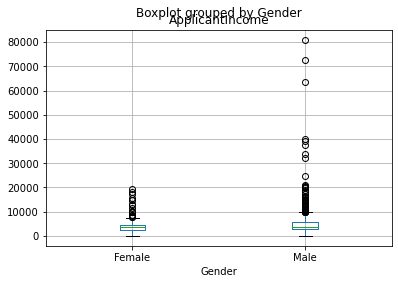

In [69]:
df_loan.boxplot (column = 'ApplicantIncome', by = 'Gender')

In [70]:
df_loan[df_loan['ApplicantIncome'] > 20000].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.00000,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.00000,360.0,1.0,Rural,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,142.51153,360.0,1.0,Rural,N
506,LP002624,Male,NaN,0,Graduate,No,20833,6667.0,480.00000,360.0,NaN,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.00000,360.0,1.0,Rural,Y
886,LP002485,Male,No,1,Graduate,No,24797,0.0,240.00000,360.0,1.0,Semiurban,NaN
893,LP002553,NaN,No,0,Graduate,No,29167,0.0,185.00000,360.0,1.0,Semiurban,NaN
757,LP001791,Male,Yes,0,Graduate,Yes,32000,0.0,550.00000,360.0,NaN,Semiurban,NaN
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.00000,360.0,1.0,Semiurban,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.00000,360.0,1.0,Semiurban,Y


In [ ]:
filtering_data = df_loan['']

In [73]:
df_loan[df_loan['LoanAmount'] > 400 ].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
898,LP002570,Female,Yes,2,Graduate,No,10000,11666.0,460.0,360.0,1.0,Urban,NaN
808,LP002077,Male,Yes,1,Graduate,No,10000,2690.0,412.0,360.0,1.0,Semiurban,NaN
604,LP002959,NaN,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


In [ ]:
# Suppression de la ligne 409 car le revenu de la personne contient trois zero
df_loan.drop(409)

In [58]:
# Remplace N
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean(),inplace= True)
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,None,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00000,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,NaN


In [75]:
def show_missing_value(df):   # reporte le nombre de valeurs manquantes pour chaque colonne
    for col in df.columns:
        missing_series = df[col][df[col].isna() == True]
        if missing_series.size > 0:
            print(col, missing_series.size)
        plt.show()
        
show_missing_value(df_loan)

Gender 86
Married 115
Dependents 75
Self_Employed 55
Loan_Amount_Term 20
Credit_History 79
Loan_Status 367


In [54]:
# Renvoie une série booléenne indiquant des lignes en double.
df_loan_duplicate = df_loan[df_loan.duplicated()]
df_loan_duplicate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
